# K-Means Clustering

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('wine-clustering.csv')
X = dataset.iloc[:,:-1].values

In [3]:
print(X)

[[14.23  1.71  2.43 ...  5.64  1.04  3.92]
 [13.2   1.78  2.14 ...  4.38  1.05  3.4 ]
 [13.16  2.36  2.67 ...  5.68  1.03  3.17]
 ...
 [13.27  4.28  2.26 ... 10.2   0.59  1.56]
 [13.17  2.59  2.37 ...  9.3   0.6   1.62]
 [14.13  4.1   2.74 ...  9.2   0.61  1.6 ]]


## Using the elbow method to find the optimal number of clusters

C:\Users\Raut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


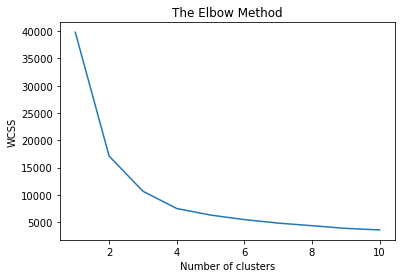

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 4)
y = kmeans.fit_predict(X)

In [6]:
print(y)

[2 0 0 0 2 0 0 2 0 0 0 0 1 1 0 0 2 2 0 2 2 0 0 0 0 2 1 1 0 0 0 0 0 2 0 0 0
 0 0 2 2 1 0 0 0 0 0 0 0 0 1 1 0 2 2 2 2 0 0 1 0 0 1 1 0 0 1 1 0 2 0 1 1 2
 0 0 1 0 2 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 2 2 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 0 2 0 1 1 1 1 1 1 1 2 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1
 1 0 2 0 2 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 2 2 0]


## Visualising the clusters

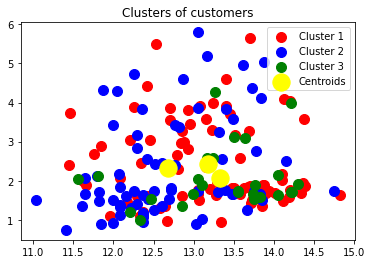

In [7]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
print(X_train)

[[13.64  3.1   2.56 ...  5.1   0.96  3.36]
 [12.6   2.46  2.2  ...  7.1   0.73  1.58]
 [11.96  1.09  2.3  ...  3.21  0.99  3.13]
 ...
 [12.42  1.61  2.19 ...  2.06  1.06  2.96]
 [13.9   1.68  2.12 ...  6.1   0.91  3.33]
 [14.16  2.51  2.48 ...  9.7   0.62  1.71]]


In [10]:
print(X_test)

[[ 13.74   1.67   2.25  16.4  118.     2.6    2.9    0.21   1.62   5.85
    0.92   3.2 ]
 [ 12.79   2.67   2.48  22.   112.     1.48   1.36   0.24   1.26  10.8
    0.48   1.47]
 [ 12.37   1.13   2.16  19.    87.     3.5    3.1    0.19   1.87   4.45
    1.22   2.87]
 [ 13.56   1.73   2.46  20.5  116.     2.96   2.78   0.2    2.45   6.25
    0.98   3.03]
 [ 13.05   5.8    2.13  21.5   86.     2.62   2.65   0.3    2.01   2.6
    0.73   3.1 ]
 [ 11.56   2.05   3.23  28.5  119.     3.18   5.08   0.47   1.87   6.
    0.93   3.69]
 [ 14.06   2.15   2.61  17.6  121.     2.6    2.51   0.31   1.25   5.05
    1.06   3.58]
 [ 12.36   3.83   2.38  21.    88.     2.3    0.92   0.5    1.04   7.65
    0.56   1.58]
 [ 12.25   1.73   2.12  19.    80.     1.65   2.03   0.37   1.63   3.4
    1.     3.17]
 [ 12.08   1.83   2.32  18.5   81.     1.6    1.5    0.52   1.64   2.4
    1.08   2.27]
 [ 13.36   2.56   2.35  20.    89.     1.4    0.5    0.37   0.64   5.6
    0.7    2.47]
 [ 13.88   5.04   2.23  20. 

In [11]:
print(y_train)

[2 1 0 0 2 0 1 2 0 0 1 2 0 1 0 1 1 1 1 1 1 0 1 0 1 2 2 0 0 1 2 1 1 0 1 1 0
 0 1 1 1 0 0 1 2 0 0 0 1 1 0 1 2 0 2 0 0 1 0 2 1 0 0 0 1 2 1 0 2 0 2 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 2 0 0 2 0 1 0 0 1 0 0 1 0 0 0 2 1 0 1 1 0 1
 1 0 1 0 2 1 1 0 2 0 0 1 0 1 0 0 0 1 1 0 0 1]


In [12]:
print(y_test)

[2 0 1 2 1 2 2 1 1 1 1 1 0 1 0 1 2 0 0 1 1 0 2 1 0 1 1 1 0 1 1 2 1 0 0 0 0
 1 0 0 0 0 1 1 1]


# Training the K-NN model on the Training set

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),
                y_test.reshape(len(y_test),1)),
                1))

[[2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[16  0  0]
 [ 2 20  0]
 [ 0  0  7]]


0.9555555555555556

# Applying k-Fold Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.49 %
Standard Deviation: 3.68 %
